<a href="https://colab.research.google.com/github/Maheshkumar145/DL_Theory/blob/main/DL_Assignment_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.	Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?**

**Ans:** RNN is trained to map an input sequence to an output sequence which is not necessarily of the same length. Applications are speech recognition, machine translation, image captioning and question answering.

The RNN model, which takes a sequence as input and outputs a single vector, produces a single vector.

The RNN model takes a single vector as input and produces a sequence as output. An example of these models can be image to sentence model, which takes an image and then produces a sentence to describe that image.



**2.	How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?**

**Ans:** Before we get started, it's crucial to remember that the RNN input requires three dimensions. It usually refers to the size of the batch, the quantity of steps, and the quantity of features.

We may use the values to determine the size of the output because the input data has certain dimensions. The brief response is as follows: Output height equals (Input height plus top and bottom padding heights minus kernel height) divided by stride height plus one.

The output layer's size is equal to the dataset's number of classes. Additionally, if a dataset contains two classes, just one output unit is required to distinguish between the two classes. Therefore, the present and recent past are the two inputs of an RNN. This is significant because an RNN can perform tasks that other algorithms are unable to, because the data sequence conveys essential information about what will happen next.



**3.	If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?**

**Ans:** The output LSTM layer of Encoder and Decoder of GRU will be a 3D tensor of shape (batch_size, timesteps, 256) should have return_sequences = True.

**4.	Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?**

**Ans:** LSTM univariate  model is used to forecast the next seven days.There are different types of LSTM models are available.

* Data Preparation
* Vanilla LSTM
* Stacked LSTM
* Bidirectional LSTM
* CNN LSTM
* ConvLSTM

**5.	What are the main difficulties when training RNNs? How can you handle them?**

**Ans:** RNNs suffer from the problem of vanishing gradients. The gradients carry information used in the RNN, and when the gradient becomes too small, the parameter updates become insignificant. This makes the learning of long data sequences difficult.

While training a neural network, if the slope tends to grow exponentially instead of decaying, this is called an Exploding Gradient. This problem arises when large error gradients accumulate, resulting in very large updates to the neural network model weights during the training process.

Long training time, poor performance, and bad accuracy are the major issues in gradient problems.

Use Long Short term memory to overcome this issue.

**6.	Can you sketch the LSTM cell’s architecture?**

**Ans:** 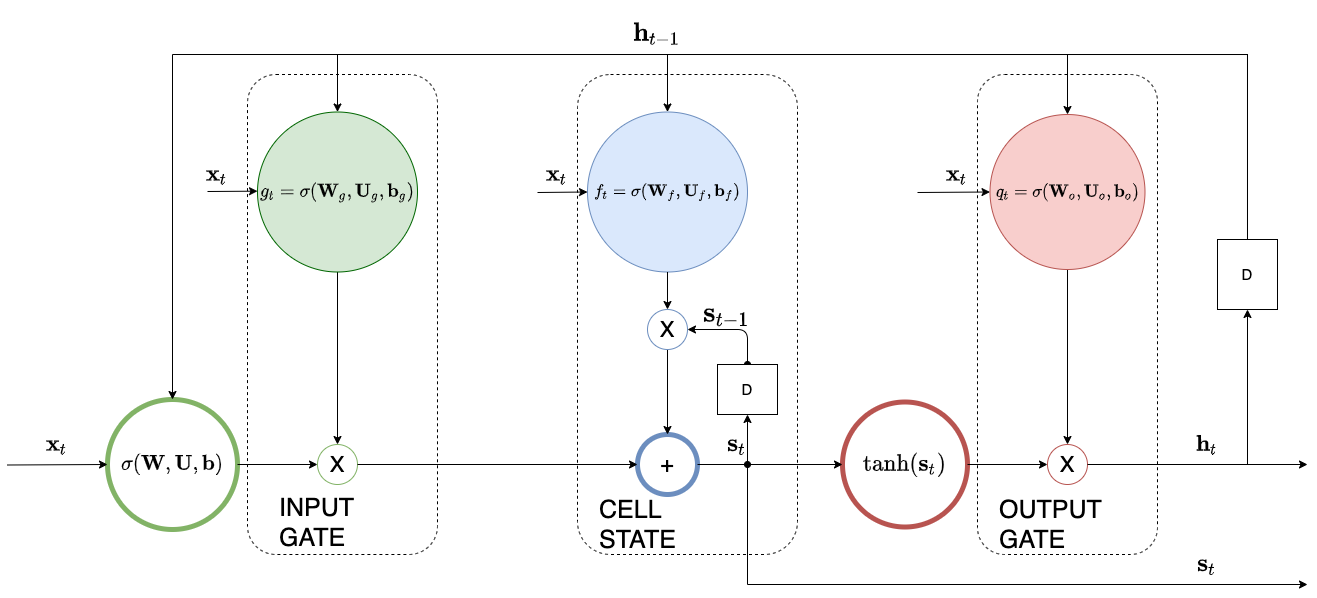

**7.	Why would you want to use 1D convolutional layers in an RNN?**

Ans:

* Its compactarchitecture configuration (rather than the complex deep architectures) which performs only 1D convolutions making it suitablefor real-time fault detection and monitoring.
* Its cost effective and practical real-time hardware implementation.

**8.	Which neural network architecture could you use to classify videos?**

**Ans:** we'll use a Convolutional Neural Network (CNN) and a Recurrent Neural Network (RNN) consisting of GRU layers. This kind of hybrid architecture is popularly known as a CNN-RNN.

9.	Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

In [1]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
import tensorflow as tf

In [3]:
# Download the data
download_root = "http://download.tensorflow.org/data/"
filename = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(filename,download_root + filename,cache_subdir="datasets/quickdraw",extract=True)

In [4]:
# split the data into train files and test files
from pathlib import Path

quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [5]:
train_files

['/root/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [6]:
eval_files

['/root/.keras/datasets/quickdraw/eval.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/eval.tfrecord-00009-of-00010']

In [8]:
# Open the classes from train and test dataset

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:train_classes = train_classes_file.readlines()

with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:test_classes = test_classes_file.readlines()

In [9]:
# get all the class name 
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [10]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [16]:
# Create a function to parse the data in batches
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths , labels

In [17]:
# Create a function to to convert the data into train,valid and test set from dataset
def quickdraw_dataset(filepaths , batch_size = 32 , shuffle_buffer_size = None,
                     n_parse_threads = 5 , n_read_threads = 5, cache = False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                     num_parallel_reads = n_parse_threads)
    if cache:
        dataset = dataset.cache()
        
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse , num_parallel_calls = n_parse_threads)
    return dataset.prefetch(1)

In [18]:
train_set = quickdraw_dataset(train_files , shuffle_buffer_size = 10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [19]:
# iterate only 1 batch
for sketches , lengths , labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[-0.2588235   0.          0.        ]
  [-0.54901963 -0.14754099  0.        ]
  [-0.04705883  0.00819672  1.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.10243903  0.00784314  0.        ]
  [-0.19512196  0.12549022  0.        ]
  [-0.03414634  0.05882353  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[-0.03529412  0.00442478  0.        ]
  [-0.00784314  0.04424779  0.        ]
  [ 0.02352941  0.04424778  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.04568528  0.12549022  0.        ]
  [-0.02030457  0.1607843   0.        ]
  [ 0.01522843  0.1372549   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

In [20]:
import matplotlib.pyplot as plt

# Create a function to draw a particular sketch
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

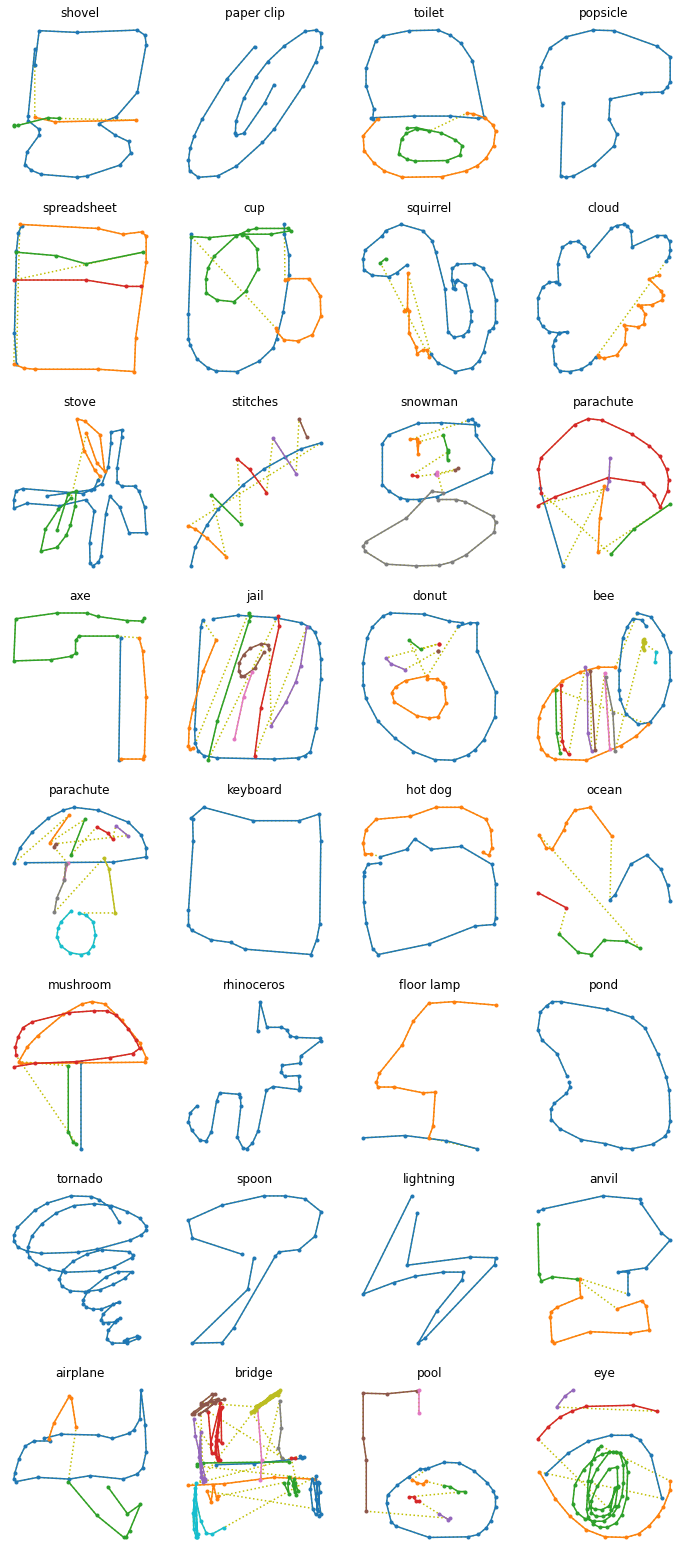

In [21]:
# Create a function to draw a sketches and print their labels
def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

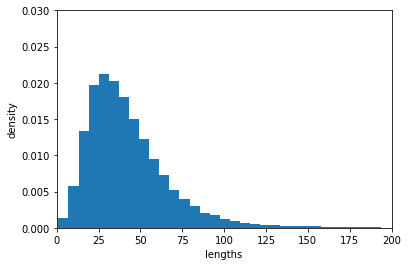

In [22]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths , bins = 150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("lengths")
plt.ylabel("density")
plt.show()